In [1]:
import numpy as np
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit import Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
import matplotlib.pyplot as plt
from functools import partial
from qiskit.circuit.library import PauliTwoDesign
from sklearn.metrics.pairwise import cosine_similarity
plt.style.use('bmh')


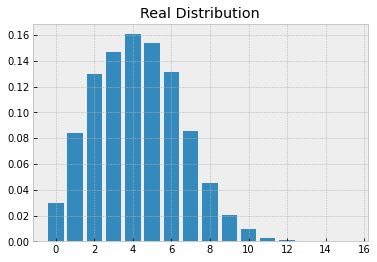

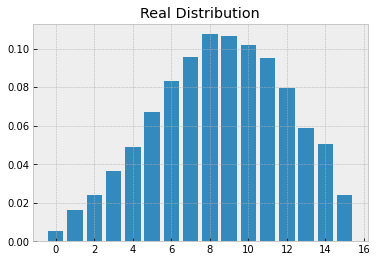

In [2]:
bounds = np.array([0.,15.])
np.random.seed = 50

real_data1 = np.random.normal(4,2.5,size=5000)
real_data1 = real_data1[real_data1<=bounds[1]]
real_data1 = real_data1[real_data1>=bounds[0]]
real_data_rounded1 = np.round(real_data1)
data_grid1 = np.arange(0,16)
real_prob1 = np.bincount(real_data_rounded1.astype(int), minlength = data_grid1.shape[0])/real_data_rounded1.shape[0]

real_data2 = np.random.normal(9,4,size=5000)
real_data2 = real_data2[real_data2<=bounds[1]]
real_data2 = real_data2[real_data2>=bounds[0]]
real_data_rounded2 = np.round(real_data2)
data_grid2 = np.arange(0,16)
real_prob2 = np.bincount(real_data_rounded2.astype(int), minlength = data_grid2.shape[0])/real_data_rounded2.shape[0]



plt.bar(data_grid1, real_prob1)
plt.title('Real Distribution')
plt.show()

plt.bar(data_grid2, real_prob2)
plt.title('Real Distribution')
plt.show()


In [3]:
real_prob=[]
real_prob.append(real_prob1)
real_prob.append(real_prob2)

In [4]:
##StateVec Simulation
#backend_ideal = Aer.get_backend('qasm_simulator')
# simulator = 'statevec'
from qiskit.providers.fake_provider import FakeNairobi
device_backend = FakeNairobi()

In [5]:
def generator_ansatz(params, distVal):
#    qc = QuantumCircuit(5,4)
    qc = QuantumCircuit(5)
    qc.h(qc.qubits[:-1])
    
    if distVal == 1:
        qc.x(qc.qubits[-1])
    if distVal == 'h':
        qc.h(qc.qubits[-1])
        
    
    
    qc.crz(params[12], qc.qubits[-1], 0)
    qc.crz(params[13], qc.qubits[-1], 1)
    qc.crz(params[14], qc.qubits[-1], 2)
    qc.crz(params[15], qc.qubits[-1], 3)
    
    
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)
    qc.ry(params[2], 2)
    qc.ry(params[3], 3)
    
    for c in range(3):
        for t in range(c+1,4):
            qc.cz(c,t)
            
    qc.ry(params[4], 0)
    qc.ry(params[5], 1)
    qc.ry(params[6], 2)
    qc.ry(params[7], 3)
    
    for c in range(3):
        for t in range(c+1,4):
            qc.cz(c,t)
            
    qc.ry(params[8], 0)
    qc.ry(params[9], 1)
    qc.ry(params[10], 2)
    qc.ry(params[11], 3)
    
#    qc.measure(qc.qubits[:-1], qc.clbits)
    
    return qc

In [6]:
def get_gen_outputs(params, backend, distVal):
    
#    gen = generator_ansatz(params, distVal)
    quantum_circ = QuantumCircuit(5,4)
    quantum_circ.append(generator_ansatz(params, distVal),[0,1,2,3,4])
    quantum_circ.measure(quantum_circ.qubits[:-1], quantum_circ.clbits)
    result = execute(quantum_circ, backend, shots = 10000).result()
    
    counts = sorted(result.get_counts().items())
    counts_data = result.get_counts()
#    if mitigate == True:
#        counts_data = mit.apply_correction(counts, [0,1,2,3])
#    else:
#    counts_data = counts
    gen_data = []
    gen_probs = []
    for c in sorted(counts_data.items()):    
        gen_data.append(int(c[0],2))
        gen_probs.append(c[1]/10000)
        
    diff = np.setdiff1d(data_grid1, gen_data)
    
    for i, n in enumerate(diff):
        gen_data = np.insert(gen_data, int(n),n)
        gen_probs = np.insert(gen_probs, int(n), 1e-4)
        
    return gen_data, gen_probs

In [7]:
def objective_function_0(params, backend=device_backend):
#    gen_data_0, gen_probs_0 = get_gen_outputs(params, backend, 0)
    dv = 0
    gen_data_0, gen_probs_0 = get_gen_outputs(params, backend, dv)
    loss = -cosine_similarity(np.array(gen_probs_0).reshape(1,-1),np.array(real_prob[dv]).reshape(1,-1))[0][0]

    print(loss)
    return loss

In [8]:
optimizer = SPSA(maxiter=1000)

num_vars = 16
params = np.random.rand(num_vars)*np.pi
res_0 = optimizer.minimize(fun = objective_function_0, x0 = params)

-0.6677594531290258
-0.6511115945299568
-0.775055606176787
-0.6031144024654314
-0.8113199039789009
-0.6056284814567496
-0.6127527716322676
-0.8225806675729032
-0.5542687557569679
-0.8231601249069752
-0.7028739134074612
-0.5682136465369055
-0.7564338476906551
-0.6805631727375413
-0.6324609378395576
-0.7586651782140292
-0.6736154024136174
-0.740342974944207
-0.7222500295624681
-0.6860513055751868
-0.7835011726707692
-0.6272561459790973
-0.7452024846233853
-0.6472441106992533
-0.602518253604893
-0.8116147457673327
-0.7034263600792542
-0.6784717236004874
-0.6804784914140412
-0.7138973973835703
-0.7292577789403296
-0.6525561267284953
-0.6604369688046352
-0.7968918648047761
-0.7220391158136373
-0.6657469520840347
-0.6530284627562541
-0.708783677559427
-0.8446178505572608
-0.5674806035092679
-0.6099995222468823
-0.7282381608718405
-0.7827553241987535
-0.5890120403210299
-0.7105950857573109
-0.6506218875886627
-0.6738846149341593
-0.7215517485313464
-0.6604151346862996
-0.7280069974483959
-0.6

-0.9720454514060104
-0.9572859504368239
-0.9679227712547767
-0.9511514867712066
-0.9397296756501178
-0.9320112923554238
-0.9553052393134185
-0.9757792184017946
-0.9692661255699475
-0.9715518384015964
-0.9666071475807891
-0.971489568385095
-0.964359458932369
-0.9526445693537884
-0.9601173600022945
-0.9604735455246611
-0.9705061398239647
-0.9523430263880401
-0.9586768927115257
-0.9667483475749881
-0.9740535977506144
-0.9550314178881194
-0.9627379206536597
-0.963007938010852
-0.9675599238469357
-0.9446096774374586
-0.9372671269901223
-0.9672304243435695
-0.9675022751035256
-0.9568674761292655
-0.9411785001189468
-0.9579039181705038
-0.9593525240039718
-0.9577852476848354
-0.9491072576631371
-0.9674838963087746
-0.967181137816472
-0.9634337142778981
-0.9630476301939763
-0.9600525112161953
-0.9611279359324293
-0.9721986729620691
-0.9733314404602798
-0.9840418858448015
-0.9790635703997226
-0.9782235192779409
-0.9664624489539129
-0.9724342342464092
-0.9675721045253558
-0.9774565489485634
-0.9

-0.956824241084355
-0.9575106839499709
-0.9643342703170474
-0.9582106745066516
-0.9743610259040233
-0.9719455375072374
-0.9561094854006227
-0.9312255539688896
-0.970298249466412
-0.9740336424560296
-0.9459604440080227
-0.9647750063780662
-0.9791378694803268
-0.9788398270970919
-0.9670609388704161
-0.962327409149058
-0.9766914580846646
-0.9782366717397323
-0.9671199510928523
-0.9585764939310227
-0.9623075565670355
-0.9589379847306514
-0.9674160703647643
-0.9672225205735615
-0.9575485853381949
-0.9757008678307935
-0.9723176081989164
-0.9805575306848098
-0.9684340693827891
-0.9642944237223703
-0.9757681278591845
-0.9779058882852295
-0.960021734326205
-0.9571402208150024
-0.9651512914759524
-0.9554975426973991
-0.9586273853702879
-0.9608542262462395
-0.9794710972773799
-0.9776839104913713
-0.9834681004500556
-0.9778995673067514
-0.9760314907024367
-0.9703895999119827
-0.9760629314234563
-0.9856603954217755
-0.9755675374698112
-0.9859348313823514
-0.9735285039394179
-0.9722128736469144
-0.9

-0.9723660019782179
-0.964903305886579
-0.9588316407206432
-0.9575185802043893
-0.9840503503689684
-0.9845901916534753
-0.9786443986475377
-0.9830231051819412
-0.9508848526911972
-0.957575084325498
-0.9664003645563819
-0.970386843788108
-0.979608019878519
-0.9750436719229587
-0.9807108380911347
-0.980242823796069
-0.9787966588908779
-0.975442472486443
-0.9701408420386793
-0.9829297018576932
-0.9760232599470412
-0.9722841833295743
-0.9547499133567294
-0.9599978636755107
-0.9777455506932984
-0.9746095067604699
-0.9807436538913141
-0.9751251479504166
-0.9679104519479965
-0.9703955212245889
-0.9665254962641172
-0.960523456808372
-0.9740917570391019
-0.9632484459910924
-0.9537901097969549
-0.968785561718047
-0.9799646846796041
-0.9801684519334306
-0.9677603347342968
-0.9625642350586427
-0.964524730871998
-0.9608577275520962
-0.9475655890223205
-0.9480988925414205
-0.9581768696559488
-0.9591924964337869
-0.9815267360563904
-0.9773697852911808
-0.9716200441683123
-0.9699194796467161
-0.963924

-0.9601845641960354
-0.9839423559527724
-0.9791455501038455
-0.9610836287706206
-0.9633269146574266
-0.9889049005412409
-0.9817288666346171
-0.9782378815302837
-0.9677174472855619
-0.9761905878667672
-0.9744839077503579
-0.9638143006457957
-0.973811419939602
-0.9730559996989822
-0.9719999866682785
-0.9609924779547442
-0.9566726053691987
-0.967570505901262
-0.9658643586666844
-0.9818639521811303
-0.9741009922659865
-0.9657256274551647
-0.9604259957660973
-0.9716663943987718
-0.9759222827980243
-0.9586154053922069
-0.9652322787205128
-0.9712117804075633
-0.9679303709247832
-0.9708584993389615
-0.9757558100297621
-0.9643847403863237
-0.9607053840906068
-0.9725054110514639
-0.9793671461600497
-0.9673916090756811
-0.9751688709659363
-0.9728011663933209
-0.9699822555633982
-0.972751902403973
-0.968708560203304
-0.9867103182436125
-0.983376093520117
-0.9822449375647627
-0.9834934052942734
-0.9825581678871871
-0.9824204274535215
-0.9558725251672271
-0.9609326111414966
-0.9729686057908844
-0.97

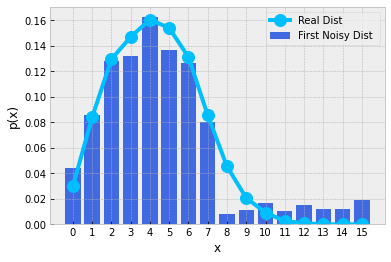

In [9]:
#Dist 1
optimal_params_0 = res_0.x
plt.plot(real_prob[0], '-o', label = 'Real Dist', color = 'deepskyblue', linewidth=4, markersize=12)
gen_data_0, gen_probs_0 = get_gen_outputs(optimal_params_0, device_backend, 0)
plt.bar(gen_data_0, gen_probs_0, color = 'royalblue',width=.8, label = 'First Noisy Dist ')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks(np.arange(0,16,1))
plt.legend()
plt.show()

In [39]:
print(optimal_params_0)

[2.00665491 2.58442554 1.06804041 1.57819306 2.05674689 2.79644052
 1.53127934 3.07921365 2.56707567 2.26457907 1.2772916  0.0856965
 0.40586787 2.03589775 1.66191165 0.66605492]


In [41]:
def objective_function_total(params, backend=device_backend):
    
    # print(backend, simulator)
    # distVal = np.random.choice([0,1], 1)
#    distVal = [0,1]
#    distVal = 0
#    loss =0 
#    for dv in distVal:
#        gen_data, gen_probs = get_gen_outputs(params, device_backend, dv)
    
#        if dv == 0:
#            loss += np.sum((gen_probs - real_prob)**2)
#        else:
#            loss += np.sum((gen_probs - real_prob2)**2)
    distVal = np.arange(0,2)
    loss = 0
    for dv in distVal:
        gen_data, gen_probs = get_gen_outputs(params, backend, dv)

        loss += -cosine_similarity(np.array(gen_probs).reshape(1,-1),np.array(real_prob[dv]).reshape(1,-1))[0][0]
    print(loss)
    return loss

In [42]:
res_total = optimizer.minimize(fun = objective_function_total, x0 = optimal_params_0)

-1.4491328728719006
-1.596560804976407
-1.5222277459544562
-1.5393012516131137
-1.5056510521061326
-1.594894719874725
-1.558940846561034
-1.6110339975027463
-1.557716799315049
-1.595234877602442
-1.5680667003358115
-1.5100405569863757
-1.5262668101593608
-1.5356092792804714
-1.4859122540236431
-1.4820005337633888
-1.4982965405309805
-1.5357670905295848
-1.5338490813136092
-1.6080943614255632
-1.524446820444136
-1.6065636741537799
-1.5376992879722065
-1.5875720289575135
-1.6304192389469936
-1.5043814657878372
-1.5836663121674524
-1.5674826766112908
-1.6385780227419589
-1.4794560930912386
-1.574612727622492
-1.532367815157676
-1.49827947503061
-1.6141918487421796
-1.55816336112866
-1.5161997416629034
-1.5850150166819188
-1.536668439698691
-1.5087927747044971
-1.522407032265511
-1.507943493619439
-1.5306980407923367
-1.5514203397677748
-1.4197261393415288
-1.4426930815128445
-1.6172987534146435
-1.505075334194428
-1.5677599960662454
-1.5910271342517972
-1.621596033664583
-1.54437489697595

-1.8925302235458112
-1.872749565913999
-1.8804431295081045
-1.8686826056624577
-1.8645506941580412
-1.8723836675182879
-1.8781141994450719
-1.903022816176828
-1.8486070315051166
-1.8702824135035137
-1.8618994935112831
-1.8876518517932306
-1.8934161043711901
-1.9092223920178388
-1.8753345627831142
-1.8791949650846194
-1.8866601605857016
-1.8781332273248508
-1.882370257132476
-1.86737480095281
-1.8796082630118476
-1.8804968103957556
-1.8772431285986304
-1.8711921132975622
-1.874698629517392
-1.8600768985422276
-1.8915764061981852
-1.8553096973716892
-1.87983899519671
-1.8703800730555769
-1.887447987847244
-1.884929201741599
-1.8752744119221192
-1.8744800194673488
-1.879552268995576
-1.890621284853361
-1.8876300646936013
-1.8837798450382792
-1.8786298632240186
-1.883071278408756
-1.884934097629155
-1.88000585458388
-1.8727910758796942
-1.880395572794008
-1.8974925170573425
-1.8960638556930907
-1.8839588413738466
-1.8691282393183282
-1.885085959140355
-1.8917792508666085
-1.865562280922669

-1.8916451700190482
-1.8884830361212726
-1.8868278475700113
-1.895410954648252
-1.8810390814131508
-1.8897580341975606
-1.8938718893757425
-1.8936412498139863
-1.8778640039091559
-1.8736766134164606
-1.8864875832689751
-1.9017033429822499
-1.8886405759057765
-1.879737736198729
-1.8999854885599967
-1.9144346109434287
-1.8963462185987794
-1.8862000949065674
-1.886020022943588
-1.8786505100911364
-1.9060468098956553
-1.8949299343921195
-1.8801852217388797
-1.8837244698126028
-1.8898863053947086
-1.8829017100709013
-1.8831392265733253
-1.8930500096690652
-1.8711838648727723
-1.8822977110752737
-1.8820178295395573
-1.8825347278587135
-1.884497610766378
-1.8855645704050623
-1.8793275477748628
-1.9010140168364926
-1.886694873278425
-1.8868743706524915
-1.8897220380413176
-1.8696465556557158
-1.9006529987345187
-1.87783118645592
-1.886651287709267
-1.8873481944197361
-1.8755542305424946
-1.8888046401984737
-1.8759534498123545
-1.8945688494986626
-1.8927733191438632
-1.8749145995231653
-1.88364

-1.888750612490838
-1.8927968372080355
-1.8825386747574715
-1.898066767611581
-1.895242806703866
-1.8912909126483743
-1.9139264788494617
-1.8805706654178866
-1.8860894843574525
-1.8859187700793534
-1.8707685448876394
-1.884361955681225
-1.8765581334348465
-1.8889224676095118
-1.8963718687390971
-1.9112790646383262
-1.9059629413640815
-1.8894671282414057
-1.8757224857421286
-1.8967114292268885
-1.883102724420306
-1.8981069780159447
-1.8914261514412116
-1.9117013963345086
-1.896470634488833
-1.8752390869900075
-1.8757328860254285
-1.9002899174835828
-1.8822809390603932
-1.8921176506158237
-1.893743138540906
-1.8854707674103928
-1.8980355978269334
-1.8847349499633628
-1.8911149747746796
-1.8847567189756127
-1.8869557561517243
-1.8827745370512714
-1.8968778940292796
-1.9085270073690968
-1.896865627133029
-1.8884646842990385
-1.8767888140531754
-1.8980814650944224
-1.9014053418591599
-1.9097225645653304
-1.8960399445063936
-1.88622266207994
-1.893950874991762
-1.90179090437212
-1.8868186934

-1.89570895237232
-1.9001834096283203
-1.8934294137790786
-1.8926602714433804
-1.8917357987169123
-1.884932211500615
-1.8977870535152601
-1.9078423974151588
-1.8950871956521367
-1.8906735783436048
-1.8935636492907908
-1.8828523399319268
-1.8924755770504644
-1.8943329901825785
-1.9178424256881588
-1.9004477235958894
-1.89098348311337
-1.8972052608499221
-1.8732100918469823
-1.8761808205750312
-1.892283280828094
-1.8998419345229152
-1.8955478332807418
-1.8973762454597805
-1.9041504547147206
-1.8930441007631007
-1.8902347975078024
-1.8831903324476436
-1.874914689709614
-1.9145985765768323
-1.9001161899363535
-1.8917519495189512
-1.889280070582617
-1.9040569867690884
-1.8882564822694894
-1.9024128706564896
-1.9013439728268557
-1.89532211165505
-1.888812755066955
-1.8985588632017594
-1.9032951120666373
-1.9016217215853688
-1.900478286848847
-1.8917071940777923
-1.898485537170314
-1.9005661086993324
-1.902166816774654
-1.891374555414289
-1.8928319568327145
-1.901828937578605
-1.8909370001249

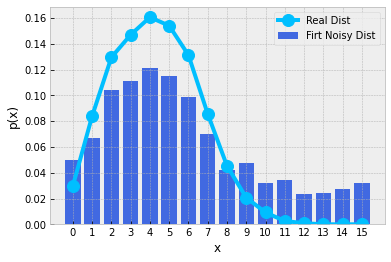

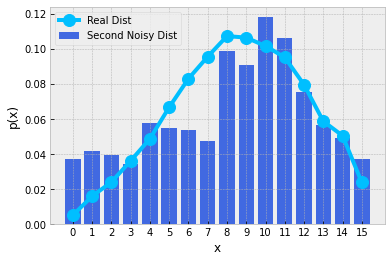

In [44]:
#Dist 1
optimal_params_total_0 = res_total.x
plt.plot(real_prob[0], '-o', label = 'Real Dist', color = 'deepskyblue', linewidth=4, markersize=12)
gen_data_total_0, gen_probs_total_0 = get_gen_outputs(optimal_params_total_0, device_backend, 0)
plt.bar(gen_data_total_0, gen_probs_total_0, color = 'royalblue',width=.8, label = 'Firt Noisy Dist')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks(np.arange(0,16,1))
plt.legend()
plt.show()

#Dist 2
optimal_params_total_1 = res_total.x
plt.plot(real_prob[1], '-o', label = 'Real Dist', color = 'deepskyblue', linewidth=4, markersize=12)
gen_data_total_1, gen_probs_total_1 = get_gen_outputs(optimal_params_total_1, device_backend, 1)
plt.bar(gen_data_total_1, gen_probs_total_1, color = 'royalblue',width=.8, label = 'Second Noisy Dist')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks(np.arange(0,16,1))
plt.legend()
plt.show()

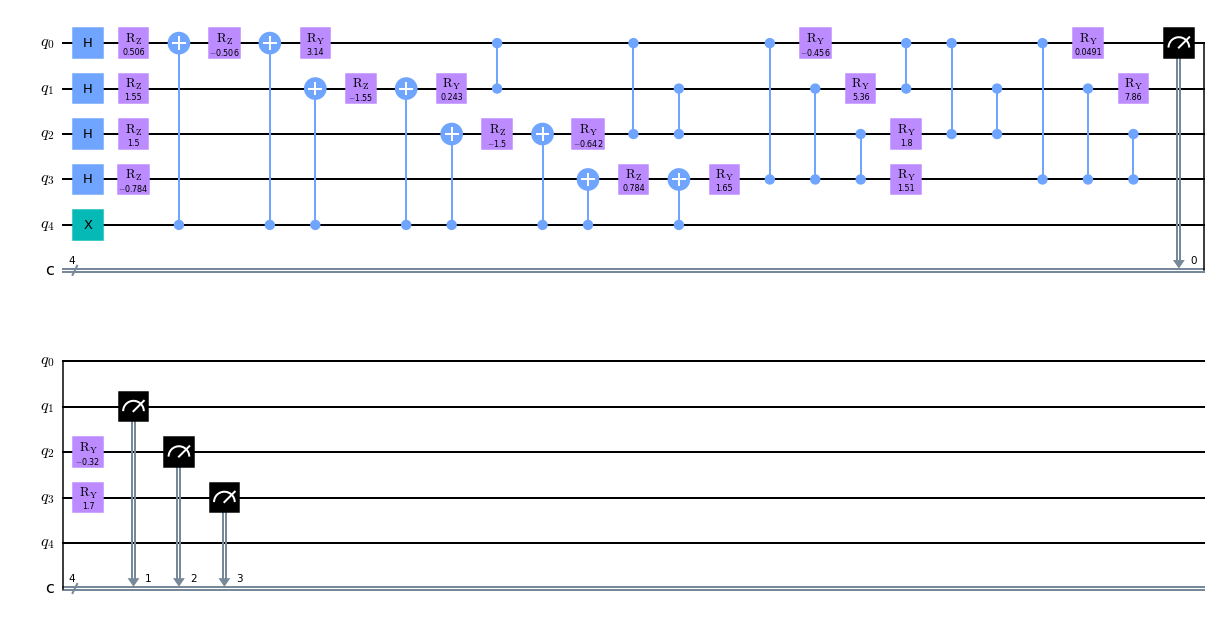

In [62]:
quantum_circ_1 = QuantumCircuit(5,4)
quantum_circ_1.append(generator_ansatz(res_total.x, 1).decompose('crz'),[0,1,2,3,4])
quantum_circ_1.measure(quantum_circ_mitigate_0.qubits[:-1], quantum_circ_mitigate_0.clbits)
quantum_circ_1.decompose().draw('mpl')


In [45]:
import mitiq
from mitiq import ddd

def get_gen_outputs_mitigate(params, backend, distVal, rule):
    quantum_circ = QuantumCircuit(5,4)
    new_circuit = mitiq.ddd.insertion.insert_ddd_sequences(generator_ansatz(params, distVal).decompose('crz'), rule)
    quantum_circ.append(new_circuit,[0,1,2,3,4])
    quantum_circ.measure(quantum_circ.qubits[:-1], quantum_circ.clbits)
    result = execute(quantum_circ, backend, shots = 10000).result()
    
    counts = sorted(result.get_counts().items())
    counts_data = result.get_counts()
    gen_data = []
    gen_probs = []
    for c in sorted(counts_data.items()):    
        gen_data.append(int(c[0],2))
        gen_probs.append(c[1]/10000)
        
    diff = np.setdiff1d(data_grid1, gen_data)
    
    for i, n in enumerate(diff):
        gen_data = np.insert(gen_data, int(n),n)
        gen_probs = np.insert(gen_probs, int(n), 1e-4)
        
    return gen_data, gen_probs

In [55]:
def objective_function_total_mitigate(params, backend=device_backend):
    distVal = np.arange(0,2)
    loss = 0
    rule = ddd.rules.xx
    for dv in distVal:
        gen_data_mitigate, gen_probs_mitigate = get_gen_outputs_mitigate(params, backend, dv, rule)
        loss += -cosine_similarity(np.array(gen_probs_mitigate).reshape(1,-1),np.array(real_prob[dv]).reshape(1,-1))[0][0]
    print(loss)
    return loss

res_total_mitigate = optimizer.minimize(fun = objective_function_total_mitigate, x0 = optimal_params_0)

-1.4442374641018945
-1.6029665994892728
-1.577359398165561
-1.484956201557869
-1.4882875361888246
-1.5302878188162858
-1.4994842532743167
-1.4484338845760005
-1.577913049160813
-1.4905840741477985
-1.5312765951992686
-1.4792621258358079
-1.563284568305536
-1.5481043095562779
-1.4549769691179928
-1.521392127229786
-1.5117256726262491
-1.6458804826810214
-1.5298276242718145
-1.6048016416408122
-1.6083555183225886
-1.4978108900339198
-1.4106092881311172
-1.5893699138147264
-1.5995547378882742
-1.5293524576773119
-1.58830608511091
-1.5484948504821934
-1.5569335745183897
-1.5893736347869711
-1.5639018636059403
-1.6312157301168564
-1.5862046820666968
-1.5501300936207314
-1.6174081746947913
-1.4248638668114695
-1.539209954317493
-1.5107971951664223
-1.512882888651092
-1.515725680733317
-1.6246703199199657
-1.5839205210844096
-1.5302728203075888
-1.6147210032498007
-1.5871593169529208
-1.5873522802275675
-1.542148109932072
-1.5154610622016638
-1.606605229730163
-1.6252922719446457
-1.489228473

-1.9149357808353913
-1.9196237423216682
-1.9268128091447723
-1.9368362057089108
-1.9335015932522008
-1.9374249809755404
-1.9362632865217848
-1.9149156245834598
-1.9227365568200776
-1.9343858246470789
-1.9369602725611779
-1.8988215836474531
-1.9178040541127703
-1.931240908558809
-1.9275886187765263
-1.9207719195748623
-1.927584466770828
-1.9013746045801272
-1.9105973985894122
-1.9336395071935648
-1.9300976585539045
-1.9139086150542681
-1.9178719941330116
-1.9008200626666898
-1.926495293414708
-1.9464570190359543
-1.9440596731709194
-1.9132206865640056
-1.9195196810041928
-1.9280894057616136
-1.9411515670877963
-1.922289132774313
-1.922507299393632
-1.942502426900956
-1.9286027329472304
-1.9050359382264443
-1.9217134626743444
-1.9370113994998062
-1.940791556676336
-1.9413451750170614
-1.9265498400441832
-1.9380393838921952
-1.9240970056174738
-1.9189554168155016
-1.9217730577648937
-1.9233390731624898
-1.9104934383200685
-1.9089280967959432
-1.9201795665912347
-1.933226351876495
-1.92141

-1.9446105878539175
-1.934294910877529
-1.9260114054393358
-1.9375531358264828
-1.9429263818903428
-1.9377981014306063
-1.9410270566242835
-1.9442332247988379
-1.9286654726585604
-1.9342080955316971
-1.9332844220835086
-1.9431395809239944
-1.9205866465279222
-1.9304668613100917
-1.9225486360751844
-1.9399194003041367
-1.9372478437406424
-1.9465724339028099
-1.9517662064934003
-1.9478062915689165
-1.9437192623426305
-1.9415952263614498
-1.9444666972163818
-1.9413130580731566
-1.9413695770755055
-1.936916031283701
-1.952817362091871
-1.9518445867536123
-1.9590792223625741
-1.9516587432832972
-1.9553511400118349
-1.9492627145006578
-1.9442098407218753
-1.9343412145363543
-1.9425483976805074
-1.9521042379364881
-1.9345921104595365
-1.9420896679372803
-1.9443367065177655
-1.9488639773553575
-1.9426963736482343
-1.9266417962363807
-1.9315126429678848
-1.9365616458551282
-1.9393016514633739
-1.9363678040632417
-1.9531319938996252
-1.945278945610423
-1.9346088857759156
-1.9400293302291538
-1.9

-1.9411015367190494
-1.944454649807171
-1.940583276744576
-1.940758923424283
-1.9349514666523278
-1.9335161282222961
-1.9295020482268495
-1.9374219091754163
-1.9316108105474075
-1.931820116320344
-1.9281896296865297
-1.9402855276014597
-1.9360694370688265
-1.9556245680086075
-1.9549456842123771
-1.9443676241884602
-1.945377016784473
-1.9341282076363469
-1.9352592656019194
-1.9517279859534367
-1.9421280000495629
-1.9323123000351905
-1.9273677961638345
-1.918755527182471
-1.9317592722400398
-1.9475963201924371
-1.9527254628720383
-1.926813409099348
-1.9212046007474672
-1.9389976998699119
-1.9456355956935119
-1.9361443932695461
-1.9300295514614974
-1.9429533873440856
-1.9466863264444951
-1.9369746801667227
-1.9405115354922242
-1.9527063551561537
-1.9499756437349147
-1.9503479519463378
-1.9443131265981417
-1.9419071794878326
-1.9470713722156396
-1.933923765920214
-1.9328376786005592
-1.9448123603002778
-1.9428696367943838
-1.9372317948712943
-1.924068820070747
-1.9497506973868988
-1.948641

-1.9371477880505465
-1.9317111958322917
-1.9359467779010813
-1.9243817112609962
-1.931793839032028
-1.938210375956896
-1.9364412625111105
-1.9179339448497115
-1.9416910797521223
-1.9506989417049265
-1.9372935840558099
-1.932497883248425
-1.9319882574178586
-1.9487358682499532
-1.9547462186616664
-1.926693611905651
-1.9292416683910374
-1.9471221511569747
-1.9439521763385372
-1.9435903015512865
-1.951482955146892
-1.9329730380866827
-1.934244889150998
-1.935543780303839
-1.9290797252025844
-1.9291706482567426
-1.9400786609156935
-1.9493870833510156
-1.9522420042965023
-1.944846768657065
-1.9437935649096865
-1.949201673840227
-1.9445916653559239
-1.937704492844757
-1.9316408072144684
-1.9500634994427568
-1.944842433013907
-1.9555841856259135
-1.945954382820815
-1.9526311826805594
-1.959563060767672
-1.9469478770874515
-1.9477183479871543
-1.9328516833011604
-1.9308812045667456
-1.9349525681718633
-1.950695024173644
-1.956500288834849
-1.9525733964209286
-1.9283276577838744
-1.932684017872

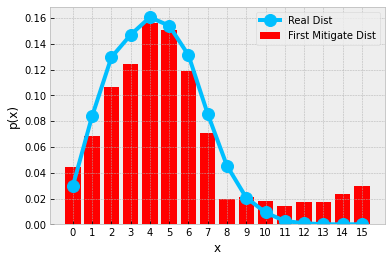

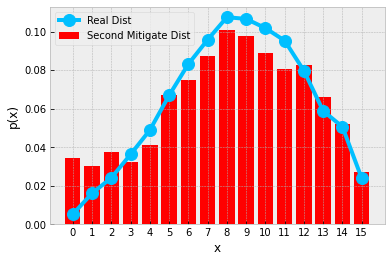

In [56]:
#Dist 1
optimal_params_total_0_mitigate = res_total_mitigate.x
plt.plot(real_prob[0], '-o', label = 'Real Dist', color = 'deepskyblue', linewidth=4, markersize=12)
gen_data_total_0_mitigate, gen_probs_total_0_mitigate = get_gen_outputs(optimal_params_total_0_mitigate, device_backend, 0)
plt.bar(gen_data_total_0_mitigate, gen_probs_total_0_mitigate, color = 'red',width=.8, label = 'First Mitigate Dist')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks(np.arange(0,16,1))
plt.legend()
plt.show()

#Dist 2
optimal_params_total_1_mitigate = res_total_mitigate.x
plt.plot(real_prob[1], '-o', label = 'Real Dist', color = 'deepskyblue', linewidth=4, markersize=12)
gen_data_total_1_mitigate, gen_probs_total_1_mitigate = get_gen_outputs(optimal_params_total_1_mitigate, device_backend, 1)
plt.bar(gen_data_total_1_mitigate, gen_probs_total_1_mitigate, color = 'red',width=.8, label = 'Second Mitigate Dist')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks(np.arange(0,16,1))
plt.legend()
plt.show()

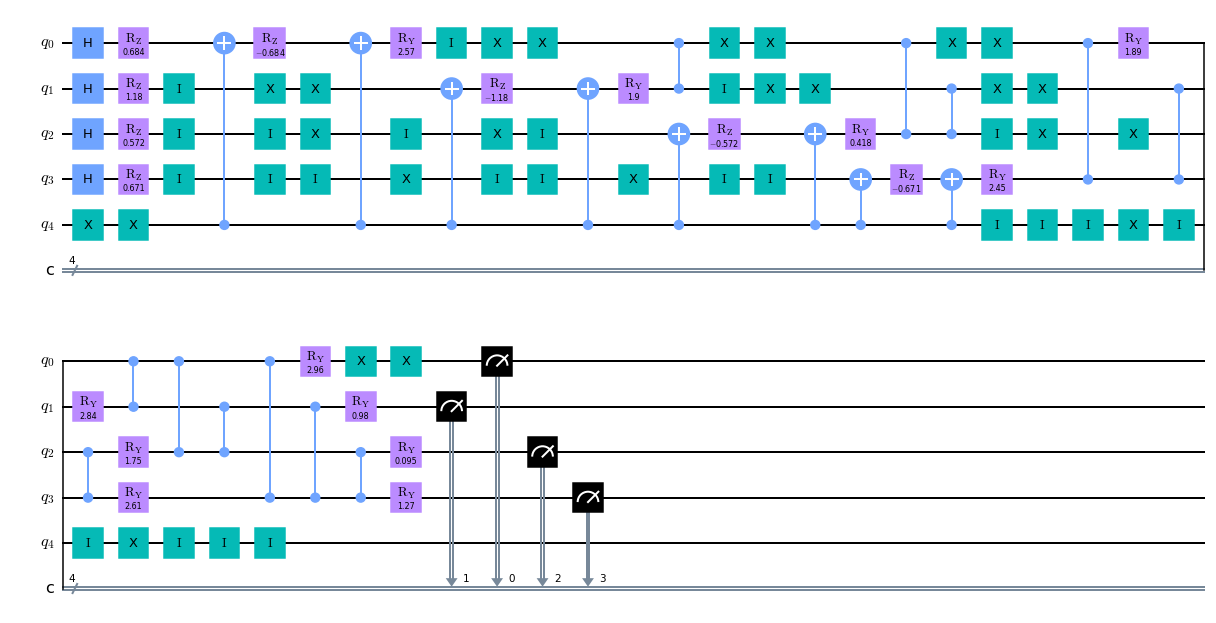

In [60]:
quantum_circ_mitigate_0 = QuantumCircuit(5,4)
rule = ddd.rules.xx
modify_circ_0 = mitiq.ddd.insertion.insert_ddd_sequences(generator_ansatz(params, 0).decompose('crz'),rule)
quantum_circ_mitigate_0.append(modify_circ_0,[0,1,2,3,4])
quantum_circ_mitigate_0.measure(quantum_circ_mitigate_0.qubits[:-1], quantum_circ_mitigate_0.clbits)
quantum_circ_mitigate_0.decompose().draw('mpl')

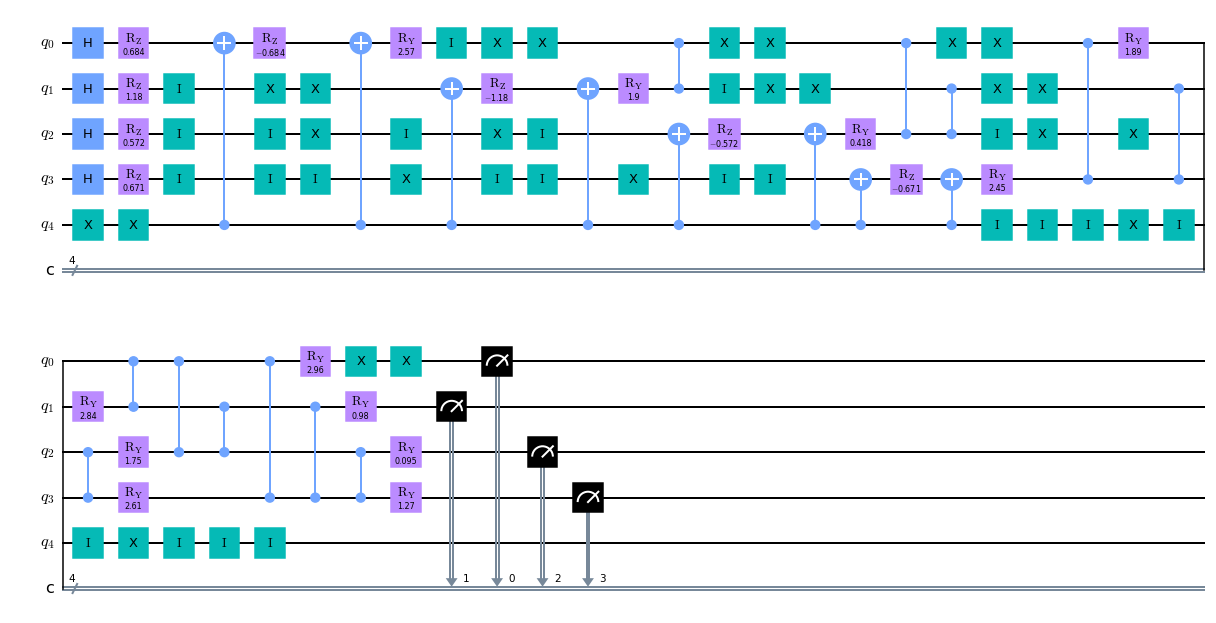

In [61]:
quantum_circ_mitigate_1 = QuantumCircuit(5,4)
modify_circ_1 = mitiq.ddd.insertion.insert_ddd_sequences(generator_ansatz(params, 1).decompose('crz'),rule)
quantum_circ_mitigate_1.append(modify_circ_0,[0,1,2,3,4])
quantum_circ_mitigate_1.measure(quantum_circ_mitigate_1.qubits[:-1], quantum_circ_mitigate_1.clbits)
quantum_circ_mitigate_1.decompose().draw('mpl')